 Welcome to the COVID-19 Tracker!
This tool shows COVID-19 stats using data from Our World In Data.

 Enter a country name (e.g., India, USA, Brazil): japan

 Latest COVID-19 Stats:
Country: Japan
Date: 2024-08-04
Total Cases: 33803572
Total Deaths: 74694
Case Fatality Rate: 0.22%


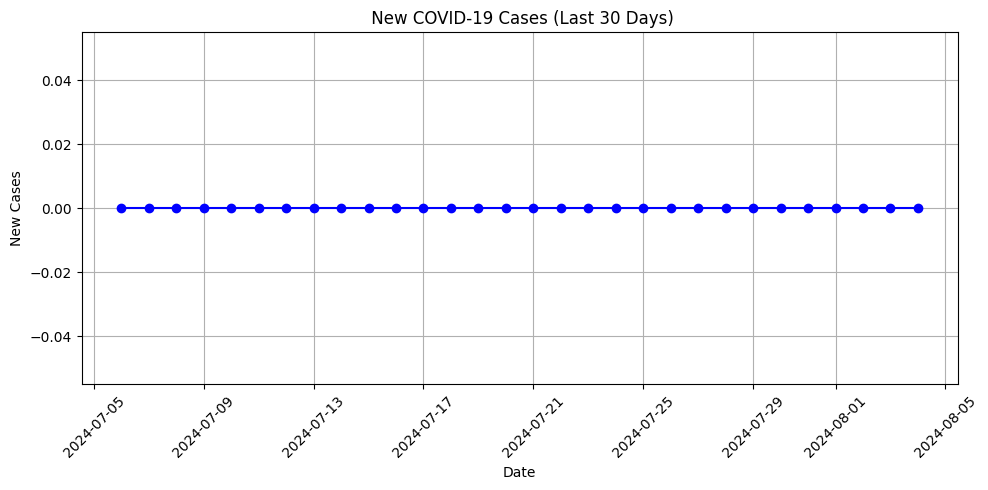

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

country_aliases={
    "india": "India",
    "usa": "United States",
    "brazil": "Brazil"
}

def load_covid_data(file_path):
    try:
        data=pd.read_csv(file_path)
        data['date']=pd.to_datetime(data['date'])
        return data
    except FileNotFoundError:
        print("CSV file not found. Please make sure 'owid-covid-data.csv' is in the same folder.")
        print("You can download it from: https://covid.ourworldindata.org/data/owid-covid-data.csv")
        return None

def get_country_data(data, country_name):
    country_data=data[data['location'].str.lower() == country_name.lower()]
    if country_data.empty:
        print(f" Sorry, no data found for '{country_name}'. Please try again.")
        return None
    return country_data

def show_summary(data):
    latest=data.sort_values('date').iloc[-1]
    print("\n Latest COVID-19 Stats:")
    print(f"Country: {latest['location']}")
    print(f"Date: {latest['date'].date()}")
    print(f"Total Cases: {int(latest['total_cases']) if pd.notna(latest['total_cases']) else 'N/A'}")
    print(f"Total Deaths: {int(latest['total_deaths']) if pd.notna(latest['total_deaths']) else 'N/A'}")

    if pd.notna(latest['total_cases']) and pd.notna(latest['total_deaths']) and latest['total_cases'] > 0:
        fatality_rate=(latest['total_deaths'] / latest['total_cases']) * 100
        print(f"Case Fatality Rate: {fatality_rate:.2f}%")
    else:
        print("Case Fatality Rate: Not Available")

def plot_recent_cases(data):
    last_30_days=data[['date', 'new_cases']].dropna().tail(30)

    if last_30_days.empty:
        print("No recent data available to plot.")
        return

    plt.figure(figsize=(10, 5))
    plt.plot(last_30_days['date'], last_30_days['new_cases'], marker='o', color='blue')
    plt.title(" New COVID-19 Cases (Last 30 Days)")
    plt.xlabel("Date")
    plt.ylabel("New Cases")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    print(" Welcome to the COVID-19 Tracker!")
    print("This tool shows COVID-19 stats using data from Our World In Data.")

    file_path="owid-covid-data.csv"
    data=load_covid_data(file_path)
    if data is None:
        return

    country=input("\n Enter a country name (e.g., India, USA, Brazil): ").strip()
    country=country.lower()
    if country in country_aliases:
        country=country_aliases[country]
    if not country:
        print(" Please enter a valid country name.")
        return

    country_data=get_country_data(data, country)
    if country_data is not None:
        show_summary(country_data)
        plot_recent_cases(country_data)


if __name__ == "__main__":
    main()